In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

plt.show()
matplotlib.rcParams["figure.figsize"] = (12,8)

df = pd.read_csv(r"X:\Program Files\Python\pythonProject\bank.csv")
#Acronyms
#default: has credit in default?
#housing: has housing loan?
#loan: has personal loan?
#contact: contact communication type
#month: last contact month of year
#day: last contact day of the week
#duration: last contact duration, in seconds
#campaign: number of contacts performed during this campaign and for this client
#pdays: number of days that passed by after the client was last contacted from a previous campaign
#previous: number of contacts performed before this campaign and for this client
#poutcome: outcome of the previous marketing campaign
#deposit - has the client subscribed a term deposit?

In [19]:
df_sorted = df.sort_values(by=["duration"], inplace=False, ascending=False)


In [20]:
df_sorted

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
271,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
7198,30,admin.,married,secondary,no,1310,no,no,telephone,27,oct,3284,1,-1,0,unknown,no
883,36,self-employed,single,tertiary,no,-103,yes,yes,telephone,17,oct,3253,1,-1,0,unknown,yes
358,28,admin.,single,secondary,no,-7,no,yes,unknown,26,jun,3183,2,-1,0,unknown,yes
4364,53,admin.,married,secondary,no,849,yes,no,cellular,6,feb,3102,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,36,management,single,tertiary,no,335,no,no,unknown,10,oct,5,1,772,4,failure,no
5483,27,unemployed,single,primary,no,93,no,no,unknown,11,oct,4,1,-1,0,unknown,no
6387,35,management,single,tertiary,no,1120,no,no,unknown,21,sep,4,1,771,2,success,no
7490,43,blue-collar,married,primary,no,0,yes,no,unknown,12,may,3,1,-1,0,unknown,no


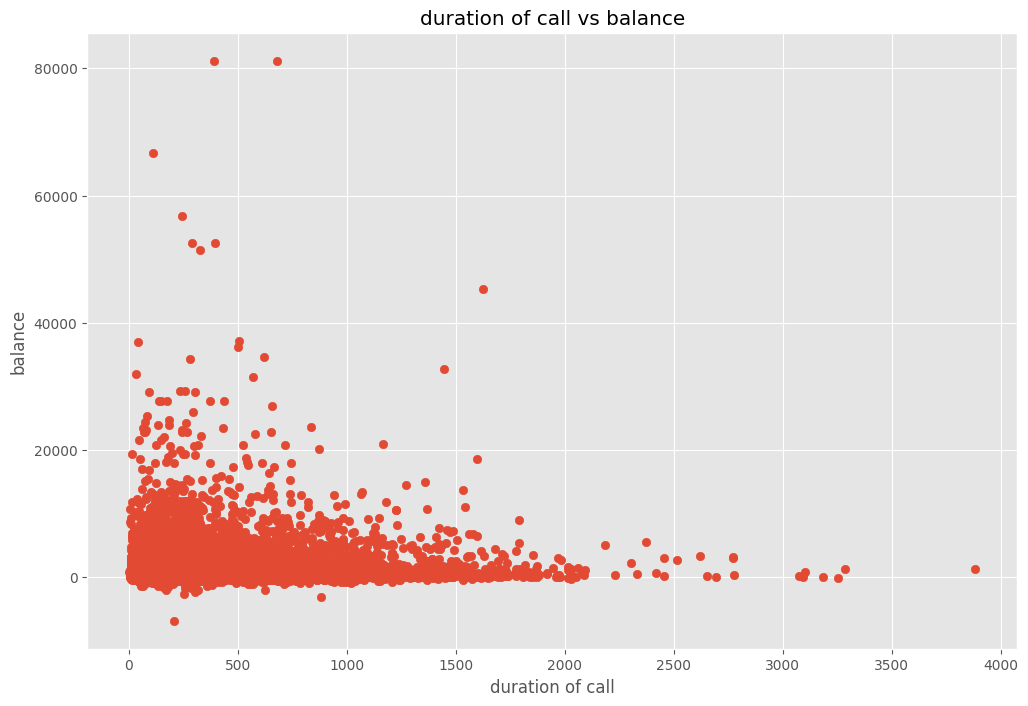

In [27]:
plt.scatter(x=df["duration"], y=df["balance"])
plt.title("duration of call vs balance")
plt.xlabel("duration of call")
plt.ylabel("balance")
plt.show()

<AxesSubplot:xlabel='duration', ylabel='balance'>

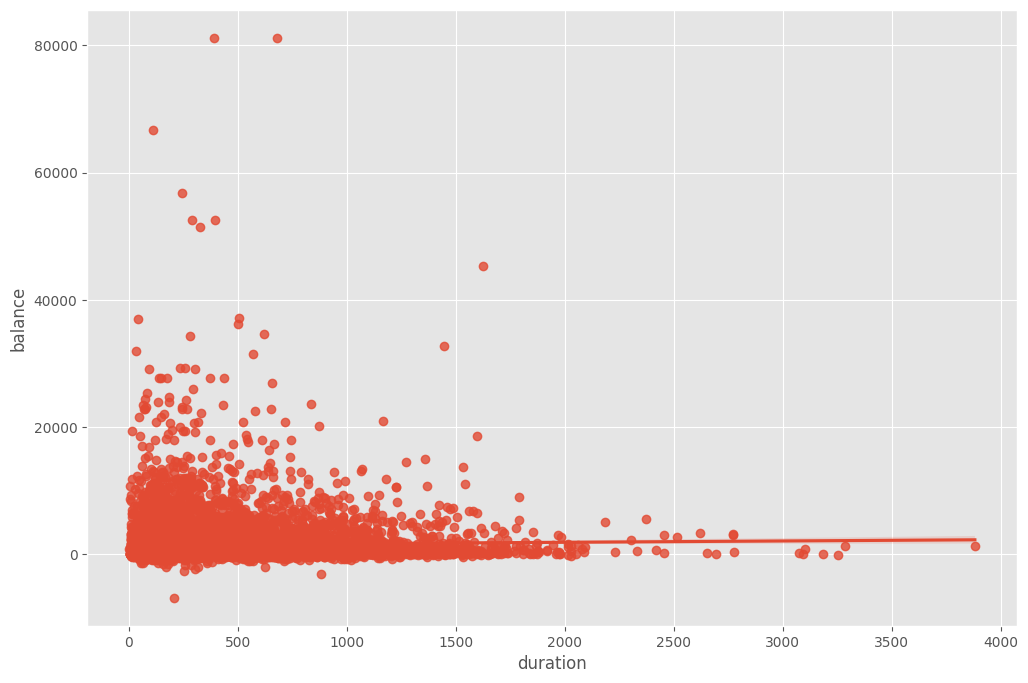

In [24]:
sns.regplot(x="duration", y="balance", data=df_sorted)

In [31]:
df.corr(method="pearson")

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


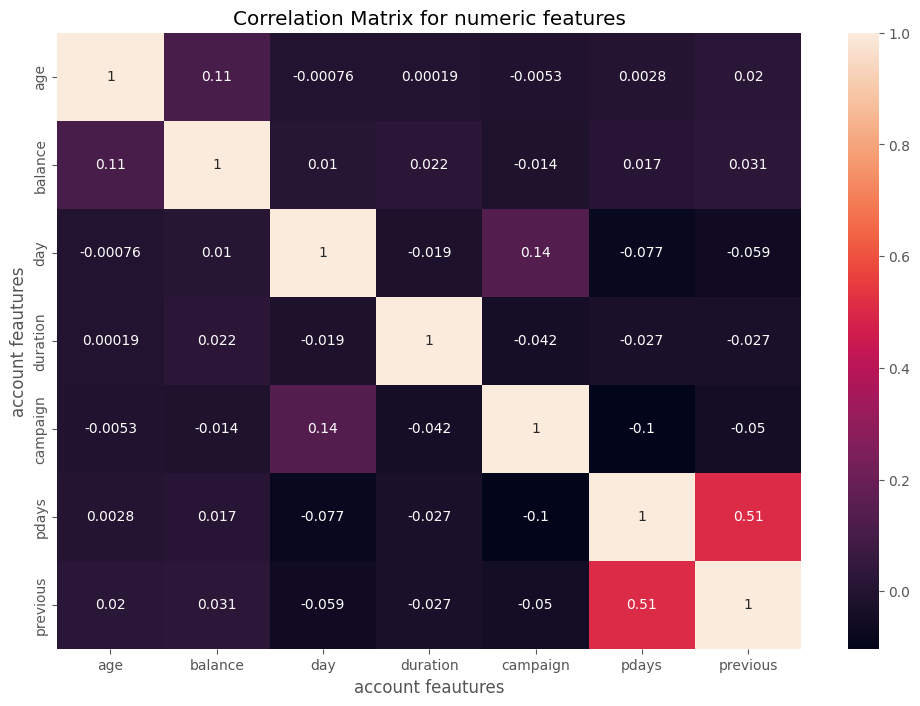

In [34]:
correlation_matrix = df.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for numeric features")
plt.xlabel("account feautures")
plt.ylabel("account feautures")
plt.show()

In [46]:
df_numerized = df_sorted

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == "object":
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
271,59,4,1,1,0,1321,0,0,2,9,6,3881,3,-1,0,3,1
7198,30,0,1,1,0,1310,0,0,1,27,10,3284,1,-1,0,3,0
883,36,6,2,2,0,-103,1,1,1,17,10,3253,1,-1,0,3,1
358,28,0,2,1,0,-7,0,1,2,26,6,3183,2,-1,0,3,1
4364,53,0,1,1,0,849,1,0,0,6,3,3102,3,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,36,4,2,2,0,335,0,0,2,10,10,5,1,772,4,0,0
5483,27,10,2,0,0,93,0,0,2,11,10,4,1,-1,0,3,0
6387,35,4,2,2,0,1120,0,0,2,21,11,4,1,771,2,2,0
7490,43,1,1,0,0,0,1,0,2,12,8,3,1,-1,0,3,0


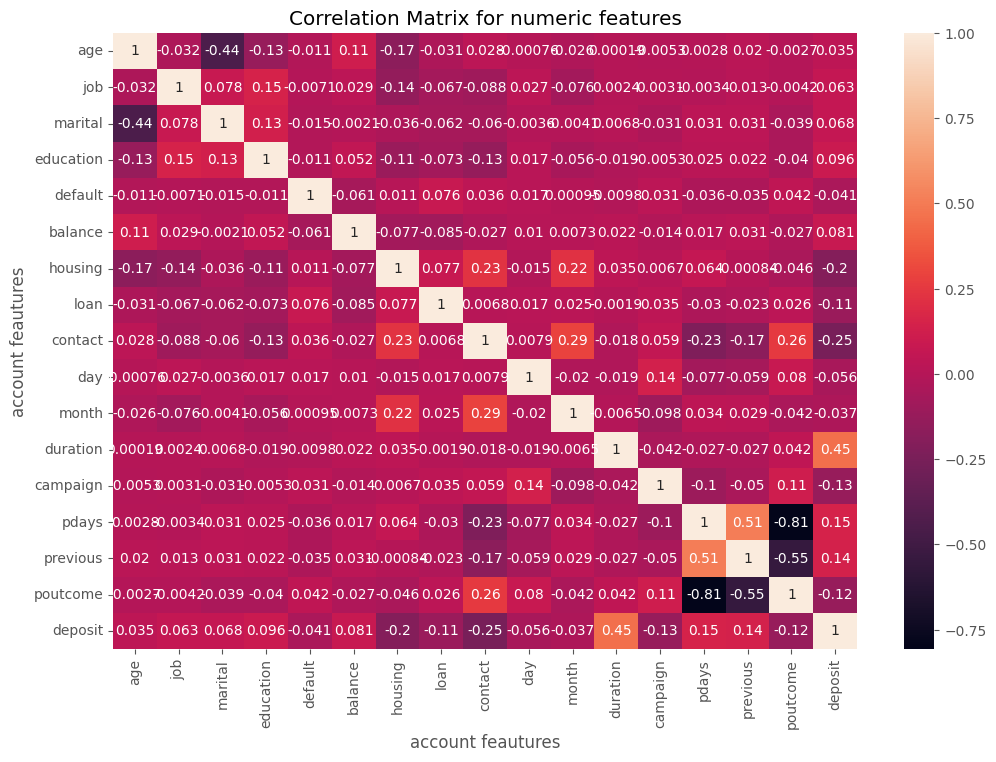

In [49]:
correlation_matrix = df_numerized.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for numeric features")
plt.xlabel("account feautures")
plt.ylabel("account feautures")
plt.show()

In [55]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) > 0.3]

high_corr

deposit    duration     0.451919
duration   deposit      0.451919
pdays      previous     0.507272
previous   pdays        0.507272
age        age          1.000000
contact    contact      1.000000
previous   previous     1.000000
pdays      pdays        1.000000
campaign   campaign     1.000000
duration   duration     1.000000
month      month        1.000000
day        day          1.000000
loan       loan         1.000000
housing    housing      1.000000
balance    balance      1.000000
default    default      1.000000
education  education    1.000000
marital    marital      1.000000
job        job          1.000000
poutcome   poutcome     1.000000
deposit    deposit      1.000000
dtype: float64

In [ ]:
#deposit and duration have high correlation